# Regressão Linear Múltipla

Ao contrário dos problemas do capítulo 2, neste caso existem múltiplas variáveis de entrada. Um problema deste tipo, por exemplo, consiste em determinar um modelo que mapeia o preço dos imóveis não somente em função do seu tamanho, mas também da quantidade de quartos, banheiros, etc. Ou seja, o modelo deve ser composto da combinação linear de todas as variáveis de entrada do problema, conforme segue.

$$
\begin{align} 
\theta = \begin{bmatrix} \theta_{0} \\ \theta_{1} \\ . \\ . \\ \theta_{n} \end{bmatrix} && 
x = \begin{bmatrix} x_{0}=1 \\ x_{1} \\ . \\ . \\ x_{n} \end{bmatrix} && 
h_{\theta}(x) = x^{T} \theta 
\end{align}$$

$$h_{\theta}(x) = \theta_{0} + \theta_{1} x_{1} + ... + \theta_{n} x_{n}$$

Uma forma de interpretar este modelo no contexto do estimador de preço dos imóveis é: considerando $x_{1}$ o tamanho em metros quadrados da casa e $x_{2}$ a quantidade de quartos, $\theta_{0}$ seria o preço base da casa, $\theta_{1}$ o preço por metro quadrado, $\theta_{2}$ o preço por cada quarto adicional, e assim por diante. 


O Gradiente para a função custo na regressão linear múltipla pode ser obtido conforme segue:

$$J(\theta) = \frac{1}{2 m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})^{2} = \frac{1}{2 m} \sum\limits_{i=1}^{m}(\theta^T x^{i} - y^{i})^{2}$$

$$\nabla J(\theta) = \begin{bmatrix} \frac{\partial J}{\partial \theta_0} & \frac{\partial J}{\partial \theta_1} & ... &  \frac{\partial J}{\partial \theta_{n}}\end{bmatrix}^T = \begin{bmatrix} \frac{1}{m} \sum\limits_{i=1}^{m}(\theta^T x^{i} - y^{i}) x_{0}^{i} & \frac{1}{m} \sum\limits_{i=1}^{m}(\theta^T x^{i} - y^{i}) x_{1}^{i} & ... & \frac{1}{m} \sum\limits_{i=1}^{m}(\theta^T x^{i} - y^{i}) x_{n}^{i} \end{bmatrix}^T$$

$$\nabla J(\theta) =  \begin{bmatrix} \frac{1}{m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i}) x^{i} \end{bmatrix}^T, \hspace{0.5em} e = h_{\theta}(x^{i}) - y^{i}$$

$$\nabla J(\theta) = \frac{1}{m} x^{T} e$$

Ou seja, o gradiente para a regressão múltipla é idêntico ao da regressão linear, exceto pela quantidade de entradas do modelo. As funções abaixo implementam o gradiente calculado:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def add_ones_column(x):
    """
    Append ones on first column ([a b c] -> [1 a b c])
    Arguments:
        x: np.array (mxn)
    Returns:
        np.array (mxn+1)
    """
    [m, n] = np.shape(x)
    new_x = np.zeros([m, n+1])
    new_x[:,0] = np.ones(m)
    new_x[:,1:] = x[:, 0:]

    return new_x

def h(x, o):
    """
    Multiple linear regression hypothesis: o0*x0 + o1*x1 + o2*x2 + on*xn
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
    Returns:
        np.array (mxk)
    """
    x = add_ones_column(x)
    return np.dot(x, o)

def J(x, o, y):
    """
    Cost function -> half mean squared error
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1x1)
        y: np.array (mx1)
    Returns:
        double
    """
    m = np.shape(x)[0]
    h_x = h(x, o) # mx1
    e = h_x - y
    return np.dot(np.transpose(e), e)*1/(2*m)

def J_for_multiple_o_set(x, o, y):
    """
    Cost function for each o set
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        np.array (1xk)
    """
    j_hist = []
    k = np.shape(o)[1]
    for i in range(k):
        o_k = np.vstack(o[:, i])
        j_hist.append(J(x, o_k, y))
    
    return np.hstack(j_hist)

def dJ(x, o, y):
    """
    Cost function gradient
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1x1)
        y: np.array (mx1)
    Returns:
        np.array (n+1x1) (cost gradient)
    """
    m = np.shape(x)[0]
    h_x = h(x, o) # mx1
    e = h_x - y
    x = add_ones_column(x)
    return np.dot(np.transpose(x), e)*1/m

def gradient_descent(x, o, y, alpha, min_grad, max_iterations):
    """
    Gradient descent -> Discover what o minimize j
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1x1)
        y: np.array (mx1)
        alpha: double (learning rate)
        min_grad: double (stop condition)
        max_iterations: int
    Returns:
        o: np.array (n+1x1)
        o_hist: np.array (n+1xi)
        i: int (iterations number)
    """
    i = 0
    o_hist = o
    grad = dJ(x, o, y)
    while np.linalg.norm(grad) > min_grad and i < max_iterations:
        o = o - alpha*grad
        o_hist = np.c_[o_hist, o] # append column

        grad = dJ(x, o, y)
        i += 1
        
    return [o, o_hist, i]

## Normalização do Conjunto de Treinamento

Conforme já discutido, a função custo é estimada para um determinado conjunto de dados treinamento através da variação dos parâmetros $\theta$ do modelo. Ademais, na regressão linear univariada de modelo $h_{\theta}(x) = \theta_{0} + \theta_{1} x$, foi possível verificar que devido a multiplicação pela variável de entrada, $\theta_1$ provoca um impacto maior no custo se comparada a $\theta_0$. Como consequência, a curva de custo na direção $\theta_1$ é mais acentuada, conforme mostrado pela figura abaixo.

<img src="imgs/linear_regression_cost_function.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Gráfico da função custo para regressão linear.
</div>

Com a inspeção da figura acima também é possível notar que uma curva mais suave, como a de $\theta_{0}$, necessita de mais iterações do algoritmo gradiente descendente para atingir o mínimo da função. No caso da regressão linear mútipla este problema fica ainda mais evidente, afinal a inclinação da curva custo pode ser impactada também pelo **range de variação do conjunto de treinamento**.

Com o objetivo de ilustrar esta dependência, a função a seguir mostra o caminho percorrido pelo gradiente descendente na curva custo. Nesta análise é excluído o parâmetro $\theta_0$ primeiro para viabilizar a visualização da trajetória através de uma superfície tridimensional e segundo para dar ênfase aos parâmetros influenciados pelo range de variação das entradas.

In [14]:
def plot_route(x, o_hist, y):
    """
    Plot cost curve in 3D surface, countour line and o_hist in these graphs
    Arguments:
        x: np.array (mxn)
        o_hist: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        
    """
    # arbitrary data to visualize cost function
    o1 = np.arange(-10, 10, 0.25)
    o2 = np.arange(-10, 10, 0.25)

    # prepare data in meshgrid format
    X, Y = np.meshgrid(o1, o2)
    
    # serialize meshgrid to use J
    c_o = np.power(len(o1), 2)
    o = np.zeros((3, c_o))
    o[1, :] = np.reshape(X, [1, c_o])
    o[2, :] = np.reshape(Y, [1, c_o])
    j = J_for_multiple_o_set(x, o, y)

    # transform j to meshgrid
    Z = np.reshape(j, np.shape(X))
    
    # get gradient descent route
    j = J_for_multiple_o_set(x, o_hist, y)
        
    # plot
    fig = plt.figure(figsize=(20,10))
    # surface
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlabel(r'$\theta_{1}$')
    ax.set_ylabel(r'$\theta_{2}$')
    
    ax.plot_surface(X, Y, Z, alpha=0.2)
    ax.plot(o_hist[1,:], o_hist[2,:], j[0], linestyle='--', marker='o')
    
    # plot contours    
    ax = fig.add_subplot(122)
    contours = ax.contour(X, Y, Z, colors='black')
    ax.plot(o_hist[1,:], o_hist[2,:], '*')

    plt.clabel(contours, inline = True, fontsize = 10)
    plt.xlabel(r'$\theta_{1}$')
    plt.ylabel(r'$\theta_{2}$')

Abaixo verificaremos o comportamento da função custo para um modelo de regresão linear múltipla: $h_{\theta}(x) = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2}$ em que $\theta = \begin{bmatrix}0 & 1 &  1\end{bmatrix}^T$, ou seja, $h_{\theta}(x) = x_{1} + x_{2}$ e a entrada $x_{2}$ é definida com um range 3x maior que o de $x_{1}$

[[0.01014241]
 [1.00015481]
 [1.00005024]]
iterations: 1464


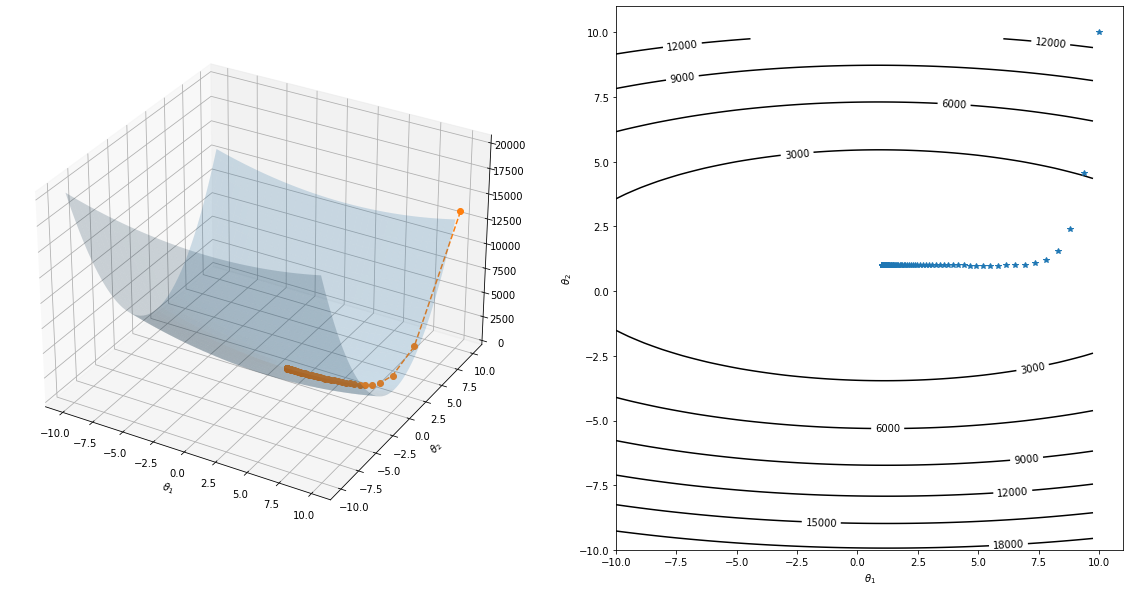

In [15]:
# model o
o1 = 0
o2 = 1
o3 = 1
o = np.array([[o1],[o2],[o3]])
# execute gradient descent to minimize o
o_start = [[0],[10],[10]] # arbitrary start
# config gradient descent
max_iterations = 10000
# alpha = 1.5e-2   # good learning rate
alpha = 2e-3   # caution with learning rate to prevent divergence
min_grad = 1.0e-2

x = np.mgrid[-10:10:1, -30:30:3].reshape(2,-1).T # mx2
y = h(x,o)
[min_o, o_hist_gd, iterations] = gradient_descent(x, o_start, y, alpha, min_grad, max_iterations)
print(min_o)
print('iterations:', iterations)
plot_route(x, o_hist_gd, y)

Devido ao range maior de $x_{2}$ as variações de $\theta_{2}$ resultam em um impacto maior sobre a função custo quando comparado a $\theta_{1}$, como consequência, além do formato elipsoidal das curvas de nível, é possível constatar uma inclinação muito maior da função na direção de $\theta_{2}$. A suavidade da curva na direção de $\theta_{2}$ torna o processo de minimização ineficiente visto que requer uma quantidade maior de iterações do algoritmo gradiente descente.

Nestes cenários uma etapa de **normalização dos dados de treinamento** se faz necessária. O procedimento definido a seguir consiste em subtrair os valores de cada entrada pela sua média $\mu_{j}$ e após dividir pelo valor de seu range $s_{j} = max(x_{j}) - min(x_{j})$. O objetivo é redefinir o range de todas as entradas para o mesmo intervalo $-0.5 \leq x_{j} \leq 0.5$ e assim melhorar a performance do processo de minimização.

$$x_{j} = \frac{x_{j} - \mu_{j}}{s_{j}}$$

Os scripts a seguir implementam a normalização e mostram o seu impacto na minimização do modelo proposto.

In [16]:
def norm(x):
    """
    Nomalize x
    Arguments:
        x: np.array (mxn)
    Returns:
        np.array (mxn)
    """
    # axis = 0 -> by column, 1 -> by row
    u = np.mean(x, axis = 0)
    s = np.ptp(x, axis = 0)
    return (x - u)/s

[[4.42488712e-12]
 [1.07038481e+00]
 [1.07038481e+00]]
iterations: 15


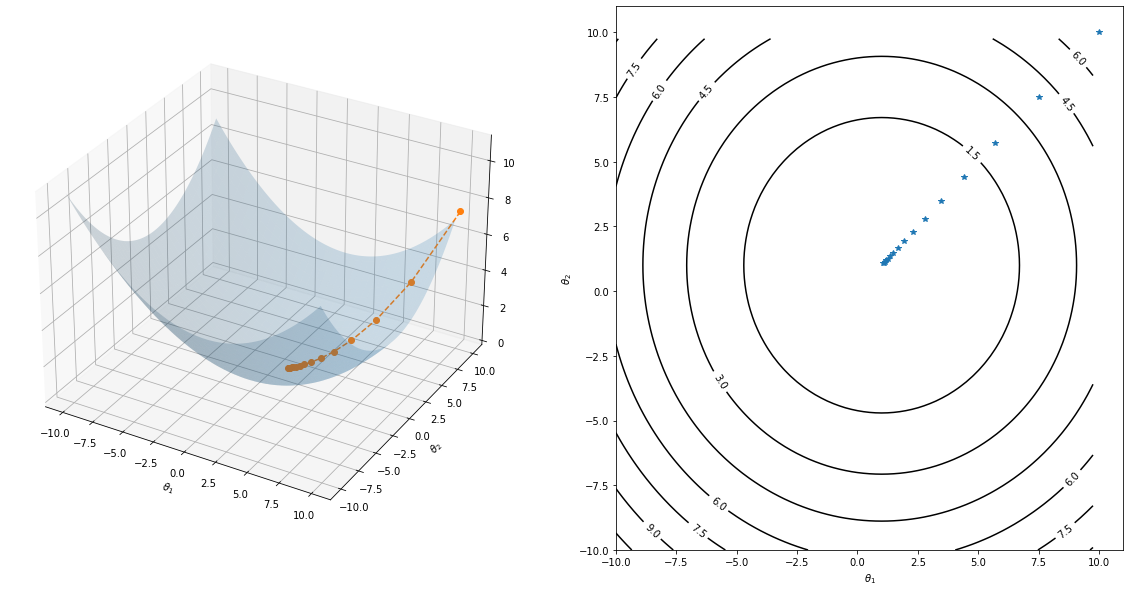

In [17]:
alpha = 3   # good learning rate
x_norm = norm(x)
y = h(x_norm,o)
[min_o, o_hist_gd, iterations] = gradient_descent(x_norm, o_start, y, alpha, min_grad, max_iterations)
print(min_o)
print('iterations:', iterations)
plot_route(x_norm, o_hist_gd, y)

O gráfico da função custo mostra que após a normalização ambas as direções possuem a mesma inclinação, o que também pode ser verificado no formato perfeitamente circular das curvas de nível. A consequência da normalização é um processo de minimização mais eficiente com aproximadamente 100x menos iterações, visto que o deslocamento em direção ao mínimo se dá de forma simétrica em todas as direções.

Uma desvantagem da normalização é a necessidade de normalização das entradas também durante a fase de inferência, visto que o modelo obtido é adequado somente ao range normalizado. Sendo assim, os parâmetros $\mu_{j}$ e $s_{j}$ estimados no treinamento devem ser armazenados.

## Solução Analítica

A regressão linear tem por objetivo determinar os parâmetros $\theta$ que minimizam a função custo. Entretanto devido a simplicidade do problema, os parâmetros $\theta$ podem ser obtidos analiticamente em função de $x$ e $y$, através da **equação normal** deduzida a seguir.

$$J_{\theta} = \frac{1}{m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})^{2}$$
$$e = h_{\theta}(x^{i}) - y^{i}$$
$$MSE = \frac{1}{m} e^{T} e$$

O valor de $\theta$ que minimiza a função é o valor para o qual o gradiente é nulo, ou seja, é a região da curva de custo que não possui inclinação. Esta afirmativa decorre do fato da função custo para a regressão linear ser uma função convexa, isto é, uma classe de curvas que possui somente um mínimo local.   

$$min_{\theta}(J_\theta) = \nabla(J_\theta) = 0$$

$$\frac{\partial e^T e}{\partial \theta} = 2 e^T \frac{\partial e}{\partial \theta}$$
$$2 (y - x \theta)^T (-x) = 0$$
$$x^{T}(y -x \theta) = 0$$
$$x^{T} y = x^{T} x \theta$$
$$\theta = (x^{T} x)^{-1} x^{T} y$$

O script abaixo implementa a equação normal e mostra a solução dos parâmetros $\theta$ que minimizam a função custo.

In [19]:
def normal_equation(x, y):
    """
    Normal equation to find o wich minimize J
    Arguments:
        x: np.array (mxn)
        y: np.array (mx1)
    Returns:
        np.array (n+1x1) (o)
    """
    x = add_ones_column(x)
    x_t = np.transpose(x)
    return np.dot(np.dot(np.linalg.inv(np.dot(x_t, x)), x_t), y)

#analitycal_solution
x = np.mgrid[-10:10:1, -30:30:3].reshape(2,-1).T # mx2
y = h(x,o)
print(np.shape(normal_equation(x, y)))
print('min_o:', normal_equation(x, y)) 

(3, 1)
min_o: [[-3.37507799e-14]
 [ 1.00000000e+00]
 [ 1.00000000e+00]]


Um problema surge nesta abordagem quando a matriz resultante do produto $x^{T} x$ não é inversível. As causas da singularidade normalmente estão associadas a duas características:
* As entradas são linearmente dependentes. (Ex: $x_{1} = 10 x_{2}$) 
* A quantidade de entradas é maior que o conjunto de treinamento. $(n > m)$

Em ambos os casos a solução passa pela exclusão das entradas menos relevantes para o modelo.

Pois bem, se existe um método analítico para a solução do problema de regressão linear porque discutimos o gradiente descente que é um algoritmo iterativo e portanto com maior custo computacional ?

A equação normal se aplica somente para funções custo convexas, além disso para a maior parte dos problemas de regressão linear a solução analítica não é aplicável devido ao tamanho do conjunto de treinamento. O problema reside no custo computacional para solução da  matriz inversa $(x^{T} x)^{-1}$ que possui ordem $nxn$ e complexidade $O(n^{3})$. Para dataset's reais o gradiente descendente com complexidade $O(k n^{2})$ normalmente apresenta melhor custo benefício.

## Regressão Polinomial

A regressão polinomial tem como foco estimar os parâmetros de um fenômeno não linear cuja função é dada por um polinômio. Abaixo segue um exemplo de um polinômio cúbico, ou seja, de ordem 3. 

$$h_{\theta}(x) = \theta_{0} + \theta_{1} x + \theta_{2} x^2 + \theta_{3} x^3$$

Para a regressão polinomial podemos utilizar o mesmo modelo aplicado para a regressão linear multiváriavel, bastantado para tanto a troca de variáveis definida a seguir.

$$ \begin{bmatrix} x \\ x^{2} \\ . \\ . \\ x^{n} \end{bmatrix} = \begin{bmatrix} x_{1} \\ x_{2} \\ . \\ . \\ x_{n} \end{bmatrix}$$ 

$$h_{\theta}(x) = \theta_{0} + \theta_{1} x_{1} + ... + \theta_{n} x_{n}$$

Ou seja, devem ser criadas $n$ entradas em que $n$ é dado pela ordem do polinômio.

### Exemplo

A seguir é realizada a regressão para uma função cúbica de parâmetros $\theta = \begin{bmatrix}-8 & -2 & 8 & 2\end{bmatrix}^T$. O script a seguir implementa a função, realiza a troca de variáveis para um domínio arbitrário e mostra o seu gráfico. 

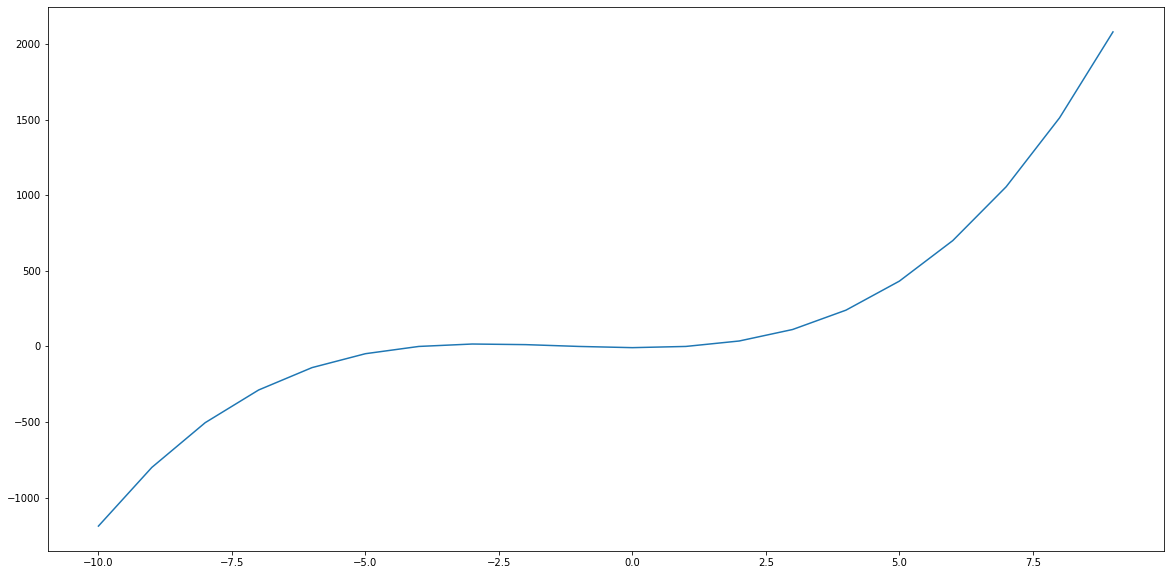

In [20]:
# polynomial regression
x = np.mgrid[-10:10:1].reshape(1,-1).T # mx1
o = np.array([[-8], [-2], [8], [2]])
x1 = x
x2 = np.power(x, 2)
x3 = np.power(x, 3)
x_cubic = np.column_stack((x1, x2, x3)) # mx3
y = h(x_cubic, o)
fig = plt.figure(figsize=(20,10))
plt.plot(x, y)

É importante notar que o processo de substituição das variáveis resulta em uma elevada diferença de range entre as variáveis. Afinal $x_1$ mantém o range de $x$ que é de $[-10, 10]$, porém $x_3$ passa a possuir um range de $[-1000, 1000]$. Posto isto, o script abaixo efetua a normalização das entradas seguida da minimização da função custo com o algoritmo gradiente descendente para o modelo de regressão linear múltipla proposto.

In [25]:
# find o
alpha = 1   # good learning rate
o_start = np.array([[10],[10],[10],[10]]) # arbitrary start
x_norm = norm(x_cubic)
[min_o, o_hist_gd, iterations] = gradient_descent(x_norm, o_start, y, alpha, min_grad, max_iterations)
print(min_o)
print(iterations)

[[ 161.        ]
 [ -36.89591656]
 [ 799.86460489]
 [3456.38966612]]
1433


Conforme já comentado, devido a normalização, os parâmetros obtidos com a minimização não são iguais aos da função que modela o fenômeno, como consequência não podem ser generalizados para entradas não normalizadas. Enfim, o script a seguir evidencia a diminuição do custo conforme o avanço nas iterações do algoritmo de minimização, além de uma comparação de performance do modelo obtida com a métrica MSE.

MSE: [[0.00974173]]


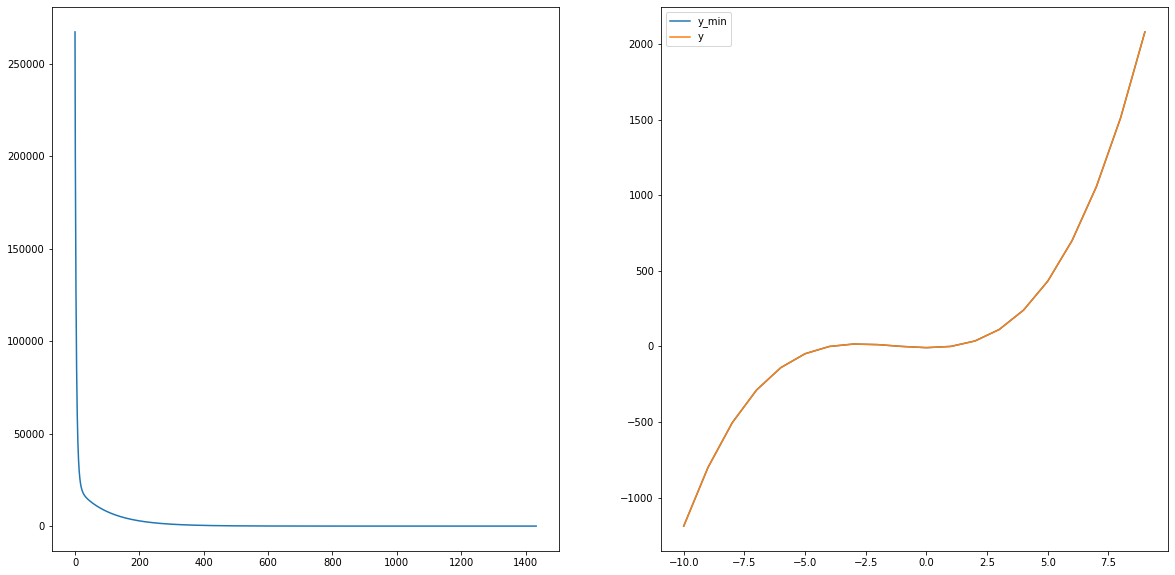

In [31]:
j_hist = J_for_multiple_o_set(x_norm, o_hist_gd, y)
y_min = h(x_norm, min_o)
fig = plt.figure(figsize=(20,10))

# cost evolution
ax = fig.add_subplot(121)
plt.plot(j_hist[0])
# comparison
print('MSE:', J(x_norm, min_o, y))
ax = fig.add_subplot(122)
plt.plot(x, y_min)
plt.plot(x, y)
plt.legend(['y_min', 'y'])

Enfim, o procedimento apresentado possui o ônus de exigir a normalização das entradas mesmo após a fase de treinamento. Uma alternativa consiste em não realizar a normalização, porém com o custo do processo de otimização se tornar excessivamente lento devido a variação de range entre as entradas.

## Engenharia de Atributos

Neste momento em que apresentamos a possibilidade do modelo ser composto por diversas variáveis (atributos) é importante discutirmos sobre os critérios para tratamento e seleção destes atributos.

A abundância de dados e recursos computacionais tem impulsionado o desenvolvimento de modelos de aprendizado de máquina que se apoderam da maior quantidade possível de variáveis, sem realizar nenhum tipo de filtro para selecionar as entradas que realmente tem impacto sobre o fenômeno de interesse. 

É verdade que em alguns estudos esta estratégia possui fundamento, afinal quando não é possível averiguar nenhuma relação clara entre o fenômeno e suas variáveis o objetivo passa a ser a identificação de algum tipo de padrão "escondido" nos dados. Entretanto para casos mais simples, a escolha cuidadosa e acertada dos atributos resulta em modelos mais concisos e portanto, de melhor custo benefício.

A engenharia de atributos excede somente a seleção das entradas relevantes para o modelo e compreende também as etapas de pré-processamento para transformação dos dados brutos em atributos úteis para o processo de aprendizado de máquina. Caracteriza-se por ser um processo amplamente manual, baseado no conhecimento do domínio do problema e normalmente composto de quatro etapas: **criar atributos, expandir atributos, transformar atributos e selecionar atributos**.  

### Criação de Atributos

Nesta etapa novos atributos são gerados a partir dos dados brutos, a função que mapeia os dados nos atributos é criada com base nos objetivos do modelo. 

Considere como exemplo um modelo de regressão com o objetivo de estimar o tempo de recorrência entre as compras dos clientes em um website, ou seja, em quanto tempo o cliente realizará uma nova compra. Para a composição do modelo os dados disponíveis são: os produtos vendidos, o perfil do cliente e a data e hora da venda. O instante das vendas não permite ao modelo inferir nada sobre novas compras, sendo assim, é necessária a criação de um novo atributo que indique a diferença em dias entre duas compras consecutivas para cada cliente.

É importante ressaltar que os atributos criados devem estar disponíveis não somente durante a fase de treinamento, mas também durante a inferência afinal eles farão parte do modelo de predição. Neste contexto, um cuidado adicional deve ser tomado com relação ao custo computacional para criação dos atributos visto que por vezes estes precisarão ser criados em tempo real em ambientes de produção com capacidade computacional restrita.

### Expansão de Atributos

A expansão dos atribuitos se dá de duas formas, através de **atributos externos** e **atributos derivados**. Os **atributos externos** compreendem as **informações externas** que são adicionadas ao modelo com base nos dados brutos. Como por exemplo o atributo nome do país, que de forma isolada não agrega grande capacidade de inferência ao modelo, porém baseado neste é possível adicionar diversas informações sobre o país como o PIB, a densidade demográfica, etc.

Os **atributos derivados**, por outro lado, são os atributos criados com a finalidade de expressar a relação matemática existente entre os atributos já criados. Como exemplo podemos considerar os atributos total gasto e quantidade de produtos adquiridos pelo cliente com os quais é possível derivar o atributo gasto médio por produto.

### Transformação de Atributos

Na transformação o objetivo geralmente é a adaptação dos dados a uma análise específica, como a transformação de dados categóricos em dados númericos e vice-versa. A transformação de atributos se baseia nos atributos já extraídos dos dados brutos e não altera a quantidade de informação disponível.

Uma aplicação corriqueira da transformação é o **preenchimento das lacunas nos dados**, o preenchimento neste caso não tem o objetivo de simplesmente sinalizar a ausência da informação, mas sim adicionar uma informação útil ao modelo. Diversas técnicas são aplicáveis nesta tarefa, em dados categóricos é comum a replicação da classe mais frequente, já em dados numéricos pode-se tomar a média ou determinar um valor com base na distribuição de probabilidade dos dados.

É também tarefa da transformação o **tratamento dos outliers**, os dados que de alguma forma se diferem dos demais. Se não removidos os outliers dificultam o processo de aprendizado de tal forma que estratégias de detecção e substituição devem ser adotadas. A técnica de detecção mais utilizada se baseia na distribuição dos dados para definir um limiar de variação aceitável para os dados, normalmente de 2 desvios padrão.

Enfim, é também responsabilidade da etapa de transformação o processo de normalização dos dados visto que alguns algoritmos de treinamento são sensíveis a variação de escala dos atributos.

### Seleção de Atributos

A seleção de atributos visa reduzir a quantidade de entradas analisadas pelo modelo, mas por que isto é necessário visto que o senso comum indica na direção de que quanto mais atributos forem adicionados ao modelo melhor será a sua capacidade de inferência? Pois bem, existem dois motivos pelos quais esta ideia é equivocada. A primeira se refere a complexidade do modelo, modelos com mais variáveis possuem um custo computacional maior que quando levado ao limite pode inviabilizar a solução em ambientes de capacidade computacional restrita.

O segundo se refere ao **aumento de dimensionalidade dos dados de entrada**, uma quantidade elevada de entradas torna os dados esparsos e dificulta a identificação de padrões. Afinal padrões emergem da repetição de combinações entre atributos e, se há uma quantidade muito grande de atributos para uma quantidade insuficiente de exemplos, estas repetições podem não ser identificadas.

Diversas técnicas podem ser utilizadas para a seleção dos atributos, a mais comum consiste em realizar diversas rodadas de treinamento removendo um atributo por vez com o objetivo de verificar o impacto da presença do atributo no desempenho do modelo, outra forma é verificar de forma prévia a correlação do atributo com a variável de saída e manter somente os atributos com alta correlação.

Uma técnica correlata a seleção é a **extração de atributos**, que possui o objetivo de procurar por melhores representações para os atributos normalmente realizando reduções de dimensionalidade como parte do processo. Ou seja, se trata de uma espécie de transformação com o objetivo de facilitar o processo de aprendizado.

### Exemplo

Tomando novamente como exemplo a predição do valor de venda das casas em um determinado bairro e utilizando como entrada somente o comprimento $C$ e a largura $L$ das residências podemos compor o seguinte modelo de regressão linear múltipla: 

$$h_{\theta}(L, C) = \theta_{0} + \theta_{1} L + \theta_{2} C$$

Entretanto, é de se esperar que o comportamento dos compradores esteja mais relacionado com a área $A$ dos imóveis ao invés do seu comprimento e lagura analisados separadamente, ou seja, o modelo de regressão linear univariada baseado na derivação do atributo área e definido a seguir deve ter uma performance melhor na predição do valor de venda: 

$$A = L C$$

$$h_{\theta}(A) = \theta_{0} + \theta_{1} A$$

Conforme foi possível constatar, a engenharia de atributos não se restringe somente a exclusão de entradas, mas também a agregação das existentes para a criação de novas. Sendo assim, a determinação das variáveis do modelo é parte fundamental do seu processo de composição, porém exige cautela, teste e conhecimento do fenômeno.

## Considerações Finais



Neste capítulo foram discutidas diversas estratégias para diminuição do custo computacional da etapa de treinamento, dentre elas a normalização das entradas, solução analítica, etc. Até o presente momento não é tão clara a importância deste processo porém ao trabalhar com datasets reais com milhares ou até mesmo milhoẽs de entradas tais abordagens se tornam imperativas para o processamento das informações.

Uma discussão mais detalhada sobre Engenharia de Recursos pode ser obtida no excelente material do professor Ricardo Matsumura presente neste [Link](https://ricardomatsumura.medium.com/engenharia-de-atributos-87370c31d0eb).

Enfim, os algoritmos desenvolvidos neste capítulo podem ser obtidos em [src/multiple_linear_regression.py](src/multiple_linear_regression.py).